Name: Gaurav Viramgami

Roll Number: 19110106

# Question 1:
How many multiplications and additions do you need to perform a matrix multiplication between a $(n, k)$ and $(k, m)$ matrix? Explain.

# Answer 1:

Total number of multiplications: $n \times m \times k$

Total number of additions: $n \times m \times (k - 1)$

Let $M_1$ be a matrix of size $(n, k)$ and $M_2$ be a matrix of size $(k, m)$.
$$
M_1 = \begin{bmatrix}
a_{11} & a_{12} & \ldots & a_{1k} \\
a_{21} & a_{22} & \ldots & a_{2k} \\
\ldots & \ldots & \ldots & \ldots \\
a_{n1} & a_{n2} & \ldots & a_{nk} \\
\end{bmatrix}
, M_2 = \begin{bmatrix}
b_{11} & b_{12} & \ldots & b_{1m} \\
b_{21} & b_{22} & \ldots & b_{2m} \\
\ldots & \ldots & \ldots & \ldots \\
b_{k1} & b_{k2} & \ldots & b_{km} \\
\end{bmatrix}
$$

$$
\implies
M_1 \times M_2 = \begin{bmatrix}
\sum_{p = 1}^{k} (a_{1p} \cdot b_{p1}) & \sum_{p = 1}^{k} (a_{1p} \cdot b_{p2}) & \ldots & \sum_{p = 1}^{k} (a_{1p} \cdot b_{pm}) \\
\sum_{p = 1}^{k} (a_{2p} \cdot b_{p1}) & \sum_{p = 1}^{k} (a_{2p} \cdot b_{p2}) & \ldots & \sum_{p = 1}^{k} (a_{2p} \cdot b_{pm}) \\
\ldots & \ldots & \ldots & \ldots \\
\sum_{p = 1}^{k} (a_{np} \cdot b_{p1}) & \sum_{p = 1}^{k} (a_{np} \cdot b_{p2}) & \ldots & \sum_{p = 1}^{k} (a_{np} \cdot b_{pm}) \\
\end{bmatrix}
$$

- Number of multiplications per cell in $M_1 \times M_2 = k$, and the size of $M_1 \times M_2 = n \times m$, which implies that total number of multiplications = $n \times m \times k$.
- Number of additions per cell in $M_1 \times M_2 = k - 1$, and the size of $M_1 \times M_2 = n \times m$, which implies that total number of additions = $n \times m \times (k - 1)$.

---

# Question 2: 

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

# Answer 2:
For smaller matrix size ($n, m, k \approx 5$), execution time using both methods is almost similar. However for larger matrix size, NumPy performs faster than list of lists. Some of the reasons behind it are:
- NumPy library is implemented in C, which is faster when compared to Python
- NumPy array uses same data-type for the whole array, which is not the case with Python lists. So, NumPy arrays are efficient for vector calculations.

In [ ]:
import timeit
import numpy as np
import random
from tqdm import tqdm

# Using list of lists

def matMulUsingList (M1 = None, M2 = None):
  """
  Input: Two non-empty matrices M1 and M2
  ( If input from console: 
  - 3 space separated integers n, k and m
  - Matrix M1: n lines each containing k space separated integers
  - Matrix M2: k lines each containing k space separated integers )

  Outpt: M1 x M2, execution time
  """

  if (M1 and M2):
    n, k, m = len(M1), len(M2), len(M2[0])
  else:
    n, k, m = list(map(int, input().split()))
    M1 = []
    for i in range(n):
      M1.append(list(map(int, input().split())))

    M2 = []
    for j in range(k):
      M2.append(list(map(int, input().split())))

  start = timeit.default_timer()

  # M = M1 x M2
  M = []
  for p in range(n):
    M.append([])
    for q in range(m):
      M[p].append(0)
      for r in range(k):
        M[p][q] += (M1[p][r] * M2[r][q])

  stop = timeit.default_timer()

  return M, stop - start

# Using numpy

def matMulUsingNumPy (M1 = None, M2 = None):
  """
  Input: Two non-empty matrices M1 and M2
  ( If input from console: 
  - 3 space separated integers n, k and m
  - Matrix M1: n lines each containing k space separated integers
  - Matrix M2: k lines each containing k space separated integers )

  Outpt: M1 x M2, execution time
  """

  if (M1 and M2):
    n, k, m = len(M1), len(M2), len(M2[0])
    M1 = np.array(M1)
    M2 = np.array(M2)
  else:
    n, k, m = list(map(int, input().split()))
    M1 = np.zeros(shape=(n, k))
    for i in range(n):
      M1[i] = list(map(int, input().split()))

    M2 = np.zeros(shape=(k, m))
    for j in range(k):
      M2[j] = list(map(int, input().split()))

  start = timeit.default_timer()

  # M = M1 x M2
  M = np.matmul(M1, M2)

  stop = timeit.default_timer()

  return M, stop - start

iterations = 1000
execList = np.zeros(iterations)
execNumPy = np.zeros(iterations)
for iter in tqdm(range(iterations)):
  n = random.randint(2, 100)
  k = random.randint(2, 100)
  m = random.randint(2, 100)
  M1 = [[random.randint(-1e5, 1e5) for i in range(k)] for j in range(n)]
  M2 = [[random.randint(-1e5, 1e5) for i in range(m)] for j in range(k)]
  MList, execTimeList = matMulUsingList(M1, M2)
  MNumPy, execTimeNumPy = matMulUsingNumPy(M1, M2)

  assert(np.array(MList).all() == MNumPy.all())
  execList[iter] = execTimeList
  execNumPy[iter] = execTimeNumPy

meanList, meanNumPy = np.mean(execList), np.mean(execNumPy)
stdList, stdNumPy = np.std(execList), np.std(execNumPy)

print()
print("[Using list of lists] Execution Time over", iterations, "iterations: ", meanList, "+/-", stdList)
print("[Using NumPy] Execution Time over", iterations, "iterations: ", meanNumPy, "+/-", stdNumPy)

100%|██████████| 1000/1000 [00:56<00:00, 17.84it/s]


[Using list of lists] Execution Time over 1000 iterations:  0.04537337946400021 +/- 0.062419938444054635
[Using NumPy] Execution Time over 1000 iterations:  0.0002652625239952613 +/- 0.000722123695873047


---

# Question 3: 
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires $2$ passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

# Answer 3: 
Finding the median will require $\approx n \backslash 2$ passes of the array, wher eeach pass requires linear time. So the time complexity will be $\mathcal{O}(n \backslash 2 \cdot n) = \mathcal{O}(n^2)$.

A better method will be to first sort the array, which can be done in time $\mathcal{O}(n \log{n})$ using merge sort. After sorting the array median can be computed as the $(n - 1) \backslash 2$ th element ($0$ - indexing) if $n$ is odd, or average of $(n-2) \backslash 2$ th element and $n \backslash 2$ th element if $n$ is even. So, the overall time complexity will be $\mathcal{O}(n \log{n})$.

Execution Time Comparasion: Execution time using NumPy < Execution time using Sorting < Execution time using Pass

In [ ]:
# n/2 passes

def medianFindUsingPass (array):
  n = len(array)
  visited = [0 for i in range(n)]
  medianCandidates = []
  for i in range((n-1)//2 + 2):
    curMax = -1e10
    curIdx = -1
    for j in range(n):
      if (visited[j] == 0):
        if (array[j] > curMax):
          curMax = array[j]
          curIdx = j
    visited[curIdx] = 1
    if (i >= (n-1)//2):
      medianCandidates.append(curMax)
  
  if (n%2 != 0):
    return medianCandidates[0]
  else:
    return (medianCandidates[0] + medianCandidates[1])/2

def medianFindUsingSort (array):
  n = len(array)
  array.sort()
  if (n%2 != 0):
    return array[(n-1)//2]
  else:
    return (array[(n-2)//2] + array[n//2])/2

def medianFindUsingNumPy (array):
  return np.median(array)

iterations = 1000
execPass = np.zeros(iterations)
execSort = np.zeros(iterations)
execNumPy = np.zeros(iterations)
for iter in tqdm(range(iterations)):
  n = random.randint(1, 1000)
  array = np.random.uniform(-1e5, 1e5, n)

  start = timeit.default_timer()
  medPass = medianFindUsingPass(array)
  end = timeit.default_timer()
  execTimePass = end - start
  execPass[iter] = execTimePass

  start = timeit.default_timer()
  medSort = medianFindUsingSort(array)
  end = timeit.default_timer()
  execTimeSort = end - start
  execSort[iter] = execTimeSort

  start = timeit.default_timer()
  medNumPy = medianFindUsingNumPy(array)
  end = timeit.default_timer()
  execTimeNumPy = end - start
  execPass[iter] = execTimeNumPy

  assert(medPass == medSort)
  assert(medSort == medNumPy)

meanPass, meanSort, meanNumPy = np.mean(execPass), np.mean(execSort), np.mean(execNumPy)
stdPass, stdSort, stdNumPy = np.std(execPass), np.std(execSort), np.std(execNumPy)

print()
print("[Using Pass] Execution Time over", iterations, "iterations: ", meanPass, "+/-", stdPass)
print("[Using Sort] Execution Time over", iterations, "iterations: ", meanSort, "+/-", stdSort)
print("[Using NumPy] Execution Time over", iterations, "iterations: ", meanNumPy, "+/-", stdNumPy)

100%|██████████| 1000/1000 [00:28<00:00, 34.53it/s]


[Using Pass] Execution Time over 1000 iterations:  0.00020213698799307166 +/- 0.000260698926581443
[Using Sort] Execution Time over 1000 iterations:  6.20883700039485e-05 +/- 0.00011568808124031777
[Using NumPy] Execution Time over 1000 iterations:  0.0 +/- 0.0


---

# Question 4: 
What is the gradient of the following function with respect to x and y?

$$
x^2 y + y^3 \sin{x}
$$

# Answer 4: 

Let $f = x^2 y + y^3 \sin{x}$.

- Gradient with respec to $x$: $\frac{\partial f}{\partial x} = 2xy + y^3 \cos{x}$

- Gradient with respec to $y$: $\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin{x}$

---

# Question 5: 
Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

# Answer 5:

In [ ]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

def f (x, y):
  return ((x**2) * y) + ((y**3) * jnp.sin(x))

def dfx (x, y):
  return 2 * x * y + ((y**3) * np.cos(x))

def dfy (x, y):
  return x**2 + (3 * (y**2) * np.sin(x))

numValues = 1000
x = np.random.uniform(-1e5, 1e5, numValues)
y = np.random.uniform(-1e5, 1e5, numValues)

xGrad, yGrad, xTrue, yTrue = np.zeros(numValues), np.zeros(numValues), np.zeros(numValues), np.zeros(numValues)

for i in tqdm(range(numValues)):
  xGrad[i], yGrad[i] = grad(f, (0, 1))(x[i], y[i])
  xTrue[i], yTrue[i] = dfx(x[i], y[i]), dfy(x[i], y[i])

print()
print("RMSE (Root Mean Squared Error) of using JAX for derivative with respect to x (Iterations:", numValues, "):", np.sqrt(np.mean((xGrad-xTrue)**2)))
print("RMSE (Root Mean Squared Error) of using JAX for derivative with respect to y (Iterations:", numValues, "):", np.sqrt(np.mean((yGrad-yTrue)**2)))

100%|██████████| 1000/1000 [00:09<00:00, 102.15it/s]


RMSE (Root Mean Squared Error) of using JAX for derivative with respect to x (Iterations: 1000 ): 375022038661.95465
RMSE (Root Mean Squared Error) of using JAX for derivative with respect to y (Iterations: 1000 ): 14054220.522598622


---

# Question 6: 
Use `sympy` to confirm that you obtain the same gradient analytically.

# Answer 6:

- Derivative of `f` with respect to `x`:  `2*x*y + y**3*cos(x)`
- Derivative of `f` with respect to `y`:  `x**2 + 3*y**2*sin(x)`

In [ ]:
from sympy import *

x, y = symbols('x y')
f = x**2 * y + y**3 * sin(x)

dfx = Derivative(f, x) 
dfy = Derivative(f, y)

print("Derivative of f with respect to x: ", dfx.doit())
print("Derivative of f with respect to y: ", dfy.doit())

Derivative of f with respect to x:  2*x*y + y**3*cos(x)
Derivative of f with respect to y:  x**2 + 3*y**2*sin(x)


---

# Question 7: 
Create a Python nested dictionary to represent hierarchical information.

# Answer 7:

In [ ]:
studentData = {
    2022: {
        "Branch 1": {
            "Student 1": {
              "Roll Number": 1,
              "Name": "N",
              "Marks": {
                  "Maths": 100,
                  "English": 70
              }
            },
            "Student 2": {
              "Roll Number": 2,
              "Name": "M",
              "Marks": {
                  "Maths": 90,
                  "English": 80
              }
            }
        },
        "Branch 2": {
            "Student 1": {
              "Roll Number": 5,
              "Name": "X",
              "Marks": {
                  "Phusics": 60,
                  "English": 70
              }
            }
        }
    },
    2023: {
        "Branch 1": {
            "Student 1": {
              "Roll Number": 1,
              "Name": "N",
              "Marks": {
                  "Maths": 100,
                  "English": 70
              }
            },
            "Student 2": {
              "Roll Number": 2,
              "Name": "M",
              "Marks": {
                  "Maths": 90,
                  "English": 80
              }
            }
        },
        "Branch 2": {
            "Student 1": {
              "Roll Number": 5,
              "Name": "X",
              "Marks": {
                  "Phusics": 60,
                  "English": 70
              }
            }
        }
    },
    2024: {
        "Branch 1": {
            "Student 1": {
              "Roll Number": 2,
              "Name": "M",
              "Marks": {
                  "Maths": 90,
                  "English": 80
              }
            }
        },
        "Branch 2": {
            "Student 1": {
              "Roll Number": 5,
              "Name": "X",
              "Marks": {
                  "Phusics": 60,
                  "English": 70
              }
            }
        }
    },
    2025: {
        "Branch 1": {
            "Student 1": {
              "Roll Number": 1,
              "Name": "N",
              "Marks": {
                  "Maths": 100,
                  "English": 70
              }
            }
        },
        "Branch 2": {
            "Student 1": {
              "Roll Number": 5,
              "Name": "X",
              "Marks": {
                  "Phusics": 60,
                  "English": 70
              }
            },
            "Student 2": {
              "Roll Number": 2,
              "Name": "M",
              "Marks": {
                  "Maths": 90,
                  "English": 80
              }
            }
        }
    }
}

---

# Question 8: 
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

# Answer 8:

In [ ]:
class Database:
  def __init__ (self, id, years):
    self.id = id
    self.years = years

class Year:
  def __init__ (self, year, branches):
    self.year = year
    self.branches = branches

class Branch:
  def __init__ (self, branch, students):
    self.branch = branch
    self.students = students

class Student:
  def __init__ (self, name, roll_number, marks):
    self.name = name
    self.roll_number = roll_number
    self.marks = marks

studentDataUsingClass = Database(id = 1, years = [
    Year(year = yearNum, branches = [
        Branch(branch = branchName, students = [
            Student(name = studentData["Name"], roll_number = studentData["Roll Number"], marks = studentData["Marks"]) 
            for studentNum, studentData in studentsDict.items()]) 
        for branchName, studentsDict in branchesDict.items()]) 
    for yearNum, branchesDict in studentData.items()]
)

---

# Question 9: 
Using matplotlib plot the following functions on the domain: $x = 0.5$ to $100.0$ in steps of $0.5$.

# Answer 9:

Text(0.5, 1.0, 'Function 7: y = e**x')

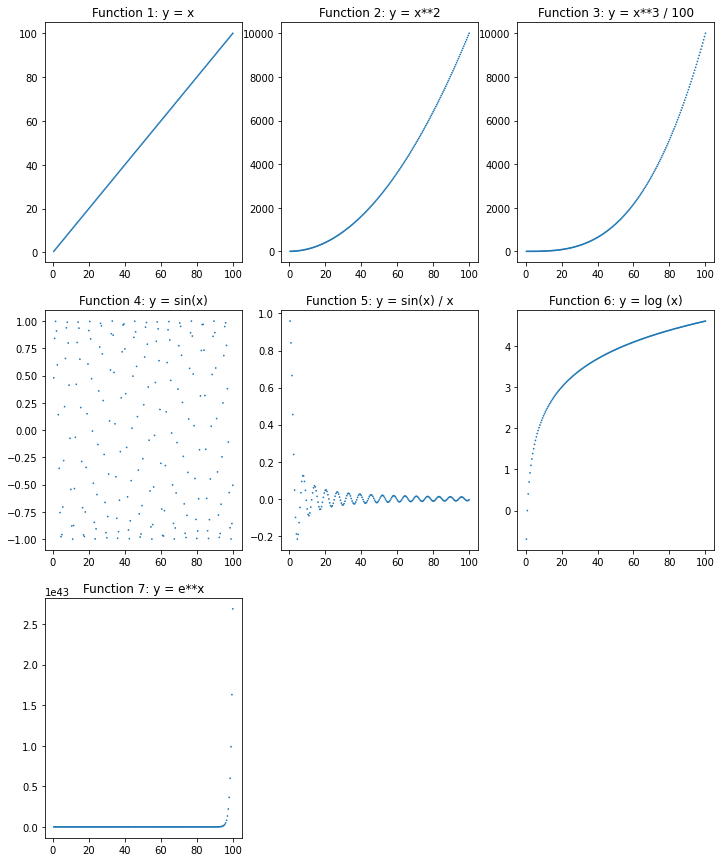

In [ ]:
import matplotlib.pyplot as plt

x = np.array([i/2 for i in range(1, 201)])

def func1 (x):
  return x

def func2 (x):
  return x**2

def func3 (x):
  return (x**3)/100

def func4 (x):
  return np.sin(x)

def func5 (x):
  return np.sin(x)/x

def func6 (x):
  return np.log(x)

def func7 (x):
  return np.exp(x)

# Scatter Plot

figure, axis = plt.subplots(3, 3, figsize=(12, 15))
figure.delaxes(axis[2,1])
figure.delaxes(axis[2,2])

markerSizes = [0.5 for i in range(len(x))]

axis[0, 0].scatter(x, func1(x), markerSizes)
axis[0, 0].set_title("Function 1: y = x")

axis[0, 1].scatter(x, func2(x), markerSizes)
axis[0, 1].set_title("Function 2: y = x**2")

axis[0, 2].scatter(x, func3(x), markerSizes)
axis[0, 2].set_title("Function 3: y = x**3 / 100")

axis[1, 0].scatter(x, func4(x), markerSizes)
axis[1, 0].set_title("Function 4: y = sin(x)")

axis[1, 1].scatter(x, func5(x), markerSizes)
axis[1, 1].set_title("Function 5: y = sin(x) / x")

axis[1, 2].scatter(x, func6(x), markerSizes)
axis[1, 2].set_title("Function 6: y = log (x)")

axis[2, 0].scatter(x, func7(x), markerSizes)
axis[2, 0].set_title("Function 7: y = e**x")

Text(0.5, 1.0, 'Function 7: y = e**x')

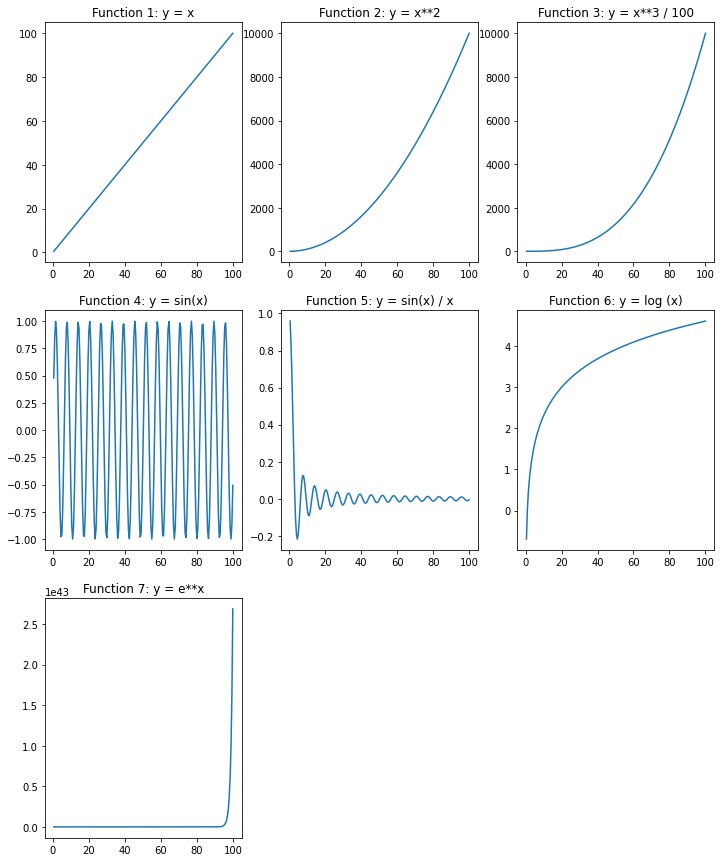

In [ ]:
# Line Plot

figure, axis = plt.subplots(3, 3, figsize=(12, 15))
figure.delaxes(axis[2,1])
figure.delaxes(axis[2,2])

axis[0, 0].plot(x, func1(x))
axis[0, 0].set_title("Function 1: y = x")

axis[0, 1].plot(x, func2(x))
axis[0, 1].set_title("Function 2: y = x**2")

axis[0, 2].plot(x, func3(x))
axis[0, 2].set_title("Function 3: y = x**3 / 100")

axis[1, 0].plot(x, func4(x))
axis[1, 0].set_title("Function 4: y = sin(x)")

axis[1, 1].plot(x, func5(x))
axis[1, 1].set_title("Function 5: y = sin(x) / x")

axis[1, 2].plot(x, func6(x))
axis[1, 2].set_title("Function 6: y = log (x)")

axis[2, 0].plot(x, func7(x))
axis[2, 0].set_title("Function 7: y = e**x")

---

# Question 10: 
Using numpy generate a matrix of size $20 \times 5$ containing random numbers drawn uniformly from the range of $1$ to $2$. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

# Answer 10:

In [ ]:
import pandas as pd

matrix = np.random.uniform(1, 2, (20, 5))
columns = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(matrix, columns = columns)
print(df)
print("Column with the highest standard deviation:", df.std(axis = 0).idxmax())
print("Row with the lowest mean (0 - indexing):", df.mean(axis = 1).idxmin())

           a         b         c         d         e
0   1.795026  1.818671  1.719696  1.025109  1.732480
1   1.173088  1.704915  1.205019  1.029399  1.916119
2   1.611828  1.242256  1.201945  1.796774  1.039368
3   1.867994  1.471436  1.854376  1.299582  1.411782
4   1.760974  1.985399  1.785143  1.646587  1.967645
5   1.679702  1.737329  1.731894  1.534256  1.119850
6   1.214122  1.097594  1.318753  1.467897  1.030645
7   1.010988  1.265981  1.131316  1.686935  1.100390
8   1.417967  1.965861  1.522669  1.543971  1.198930
9   1.883613  1.204612  1.025622  1.451739  1.022920
10  1.417420  1.488428  1.088199  1.684891  1.323419
11  1.819959  1.017904  1.924387  1.286145  1.812797
12  1.576683  1.658875  1.046979  1.531069  1.031830
13  1.678389  1.734911  1.338391  1.834855  1.410154
14  1.586943  1.530958  1.788196  1.388938  1.739547
15  1.098532  1.756496  1.365623  1.924168  1.765818
16  1.788675  1.335541  1.086319  1.331648  1.464634
17  1.897818  1.547564  1.613088  1.213406  1.

---

# Question 11: 
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

# Answer 11:

In [ ]:
df["f"] = df.sum(axis = 1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

print(df)
print("Number of rows in the dataframe where the value in the column 'g' is 'LT8':", len(df[df["g"] == "LT8"]))
print("Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8':", df[df["g"] == "LT8"]["f"].std())
print("Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8':", df[df["g"] == "GT8"]["f"].std())

           a         b         c         d         e         f    g
0   1.795026  1.818671  1.719696  1.025109  1.732480  8.090981  GT8
1   1.173088  1.704915  1.205019  1.029399  1.916119  7.028540  LT8
2   1.611828  1.242256  1.201945  1.796774  1.039368  6.892171  LT8
3   1.867994  1.471436  1.854376  1.299582  1.411782  7.905171  LT8
4   1.760974  1.985399  1.785143  1.646587  1.967645  9.145747  GT8
5   1.679702  1.737329  1.731894  1.534256  1.119850  7.803030  LT8
6   1.214122  1.097594  1.318753  1.467897  1.030645  6.129010  LT8
7   1.010988  1.265981  1.131316  1.686935  1.100390  6.195609  LT8
8   1.417967  1.965861  1.522669  1.543971  1.198930  7.649397  LT8
9   1.883613  1.204612  1.025622  1.451739  1.022920  6.588507  LT8
10  1.417420  1.488428  1.088199  1.684891  1.323419  7.002358  LT8
11  1.819959  1.017904  1.924387  1.286145  1.812797  7.861193  LT8
12  1.576683  1.658875  1.046979  1.531069  1.031830  6.845436  LT8
13  1.678389  1.734911  1.338391  1.834855  1.41

---

# Question 12: 
Write a small piece of code to explain broadcasting in numpy.

# Answer 12:

In [ ]:
a = np.random.uniform(-1e5, 1e5, (3, 5)) # Dimensin = 3 x 5
b = np.random.uniform(-1e5, 1e5, (1, 5)) # Dimension = 1 x 5
result = a + b # Dimension = 3 x 5 (array b is being stretched to dimension 3 x 5 by broadcasting b[0, :] to other rows)
print("Shape(a) =", a.shape, "Shape(b) =", b.shape, "Shape(a + b) =", result.shape)

a = np.random.uniform(-1e5, 1e5, (6, 3, 5)) # Dimensin = 6 x 3 x 5
b = np.random.uniform(-1e5, 1e5, (5)) # Dimension = 5
result = a + b # Dimension = 6 x 3 x 5 (array b is being stretched to dimension 6 x 3 x 5 by broadcasting b[:] to other dimensions)
print("Shape(a) =", a.shape, "Shape(b) =", b.shape, "Shape(a + b) =", result.shape)

a = np.random.uniform(-1e5, 1e5, (7, 1, 1, 8, 9)) # Dimensin = 7 x 1 x 1 x 8 x 9
b = np.random.uniform(-1e5, 1e5, (4, 10, 8, 9)) # Dimension = 4 x 10 x 8 x 9
result = a + b # Dimension = 7 x 4 x 10 x 8 x 9 (array a is being stretched to dimension 7 x 4 x 10 x 8 x 9 by broadcasting a[:, 0, 0, :, :] to other dimensions and array b is being stretched to dimension 7 x 4 x 10 x 8 x 9 by broadcasting b[0, 0, :, :, :, :] to other dimensions)
print("Shape(a) =", a.shape, "Shape(b) =", b.shape, "Shape(a + b) =", result.shape)

a = np.random.uniform(-1e5, 1e5, (3, 5, 6)) # Dimensin = 3 x 5 x 6
b = np.random.uniform(-1e5, 1e5, (1)) # Dimension = 1
result = a + b # Dimension = 3 x 5 x 6 (array b is being stretched to dimension 3 x 5 x 6 by broadcasting b[0, :] to other dimensions)
print("Shape(a) =", a.shape, "Shape(b) =", b.shape, "Shape(a + b) =", result.shape)

a = np.random.uniform(-1e5, 1e5, (7, 1)) # Dimensin = 7 x 1
b = np.random.uniform(-1e5, 1e5, (1, 9)) # Dimension = 1 x 9
result = a + b # Dimension = 7 x 9 (array a is being stretched to dimension 7 x 9 by broadcasting a[:, 0] to other columns and array b is being stretched to dimension 7 x 9 by broadcasting b[0, :] to other rows)
print("Shape(a) =", a.shape, "Shape(b) =", b.shape, "Shape(a + b) =", result.shape)

Shape(a) = (3, 5) Shape(b) = (1, 5) Shape(a + b) = (3, 5)
Shape(a) = (6, 3, 5) Shape(b) = (5,) Shape(a + b) = (6, 3, 5)
Shape(a) = (7, 1, 1, 8, 9) Shape(b) = (4, 10, 8, 9) Shape(a + b) = (7, 4, 10, 8, 9)
Shape(a) = (3, 5, 6) Shape(b) = (1,) Shape(a + b) = (3, 5, 6)
Shape(a) = (7, 1) Shape(b) = (1, 9) Shape(a + b) = (7, 9)


---

# Question 13: 
Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

# Answer 13:

In [ ]:
import random

def argmin (array):
  curMin = 1e10
  minIdx = -1
  for i in range(len(array)):
    if (array[i] < curMin):
      curMin = array[i]
      minIdx = i
  return i

iterations = 1000
execArgmin = np.zeros(iterations)
execNumPy = np.zeros(iterations)
for iter in tqdm(range(iterations)):
  n = random.randint(1, 1e5)
  array = np.random.uniform(-1e5, 1e5, n)

  start = timeit.default_timer()
  idArgmin = argmin(array)
  end = timeit.default_timer()
  execTimeArgmin = end - start
  execArgmin[iter] = execTimeArgmin

  start = timeit.default_timer()
  idNumPy = np.argmin(array)
  end = timeit.default_timer()
  execTimeNumPy = end - start
  execNumPy[iter] = execTimeNumPy

meanArgmin, meanNumPy = np.mean(execArgmin), np.mean(execNumPy)
stdArgmin, stdNumPy = np.std(execArgmin), np.std(execNumPy)

print()
print("[Using custom argmin function] Execution Time over", iterations, "iterations: ", meanArgmin, "+/-", stdArgmin)
print("[Using NumPy.argmin] Execution Time over", iterations, "iterations: ", meanNumPy, "+/-", stdNumPy)

100%|██████████| 1000/1000 [00:10<00:00, 96.44it/s]


[Using custom argmin function] Execution Time over 1000 iterations:  0.009174029150996375 +/- 0.00812521153253891
[Using NumPy.argmin] Execution Time over 1000 iterations:  0.00011493347299665402 +/- 0.00031088756683594746
